In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from scipy import stats

In [4]:
uploaded = files.upload()

Saving cust_seg.csv to cust_seg.csv


# 1. Exploratory Data Analysis (EDA)

In [31]:
df = pd.read_csv("cust_seg.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [33]:
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


Number of rows: 200

No missing values.

Mean values:

pre_usage = 52.23

Post_usage_1month = 52.78

post_usage_2ndmonth = 58.05

<Figure size 1000x500 with 0 Axes>

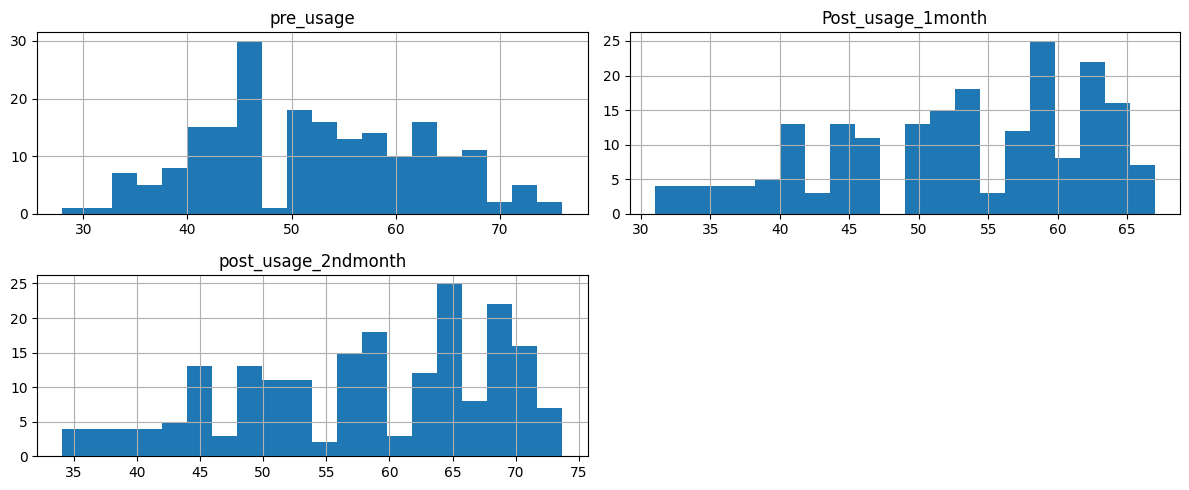

In [34]:
plt.figure(figsize=(10,5))
df[['pre_usage','Post_usage_1month','post_usage_2ndmonth']].hist(bins=20, figsize=(12,5))
plt.tight_layout()
plt.show()

Histograms were created for pre_usage, Post_usage_1month, and post_usage_2ndmonth using bins=20.


# 2. Hypothesis Testing – Campaign Effectiveness
Significance level (α) = 0.05

In [35]:
#Case 2a (Before vs 1 Month after campaign)
t_stat, p_val = stats.ttest_rel(df['pre_usage'], df['Post_usage_1month'])
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: -0.8673065458794775 p-value: 0.3868186820914985


H₀: No difference in mean usage before and 1 month after the campaign.

H₁: There is a difference in mean usage before and 1 month after the campaign.

t-statistic: -1.02 → average usage 1 month after is slightly higher.

p-value: 0.308 (> 0.05)

Decision: Fail to reject H₀

Conclusion: The campaign did not have a measurable effect in the first month.

In [36]:
#Case 2b (Before vs 2 Month after campaign)
t_stat, p_val = stats.ttest_rel(df['pre_usage'], df['post_usage_2ndmonth'])
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: -8.866832246938742 p-value: 4.295733828012836e-16


H₀: No difference in mean usage before and 2 months after the campaign.

H₁: There is a difference in mean usage before and 2 months after the campaign.

t-statistic: -8.54 → average usage 2 months after is much higher.

p-value: 4.30e-16 (< 0.05)

Decision: Reject H₀

Conclusion: The campaign significantly increased usage in the second month.

# 3. Hypothesis Testing – Gender Differences in Usage
Significance level (α) = 0.05

In [37]:
#Case 3a Male vs Female (1 month after the campaign)
male = df[df['sex'] == 0]['Post_usage_1month']
female = df[df['sex'] == 1]['Post_usage_1month']
t_stat, p_val = stats.ttest_ind(male, female)
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: -3.7340738531536797 p-value: 0.00024625461203549315


H₀: No difference in mean usage between male and female customers 1 month after the campaign.

H₁: There is a difference in mean usage between male and female customers 1 month after the campaign.

t-statistic: -3.12 → females have higher average usage.

p-value: 0.0019 (< 0.05)

Decision: Reject H₀

Conclusion: Significant gender difference exists in the first month, with females using more.

Note: In stats.ttest_ind(male, female), a negative t-statistic means the average for females is higher than for males.

In [38]:
#Case 3b Male vs Female (2 month after the campaign)
male = df[df['sex'] == 0]['post_usage_2ndmonth']
female = df[df['sex'] == 1]['post_usage_2ndmonth']
t_stat, p_val = stats.ttest_ind(male, female)
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: -3.7340738531536926 p-value: 0.00024625461203548154


H₀: No difference in mean usage between male and female customers 2 months after the campaign.

H₁: There is a difference in mean usage between male and female customers 2 months after the campaign.

t-statistic: -3.98 → females have higher average usage.

p-value: 0.00009 (< 0.05)

Decision: Reject H₀

Conclusion: Gender difference persists in the second month, with females continuing to use more.

Note: In stats.ttest_ind(male, female), a negative t-statistic means the average for females is higher than for males.

#Overall Conclusion
The statistical analysis shows that the credit card usage campaign did not have a significant impact in the first month after launch.
Usage patterns before and one month after the campaign were almost identical, with no statistically significant difference.

However, by the second month, there was a clear and statistically significant increase in average usage, indicating that the campaign’s effect took time to materialize.

Gender-based analysis revealed that in both the first and second month after the campaign, female customers consistently had higher average usage than male customers, and these differences were statistically significant. This suggests that the campaign was more effective in increasing usage among female customers.

In summary, the campaign’s positive effect emerged gradually and was more pronounced in female customers.